In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, roc_curve, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time 
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 


warnings.filterwarnings("ignore")


### Before Merging

In [2]:
def load_and_explore_data(projects_path, outcomes_path):
    projects_df = pd.read_csv(projects_path)
    outcomes_df = pd.read_csv(outcomes_path)

    #basic information
    print("Projects Dataset shape:", projects_df.shape)
    print(f"\nColumn names ({len(projects_df.columns)}):")
    print(projects_df.columns.tolist())
    print("\nFirst few rows:")
    display(projects_df.head(3).T)

    print("Outcomes Dataset shape:", outcomes_df.shape)
    print(f"\nColumn names ({len(outcomes_df.columns)}):")
    print(outcomes_df.columns.tolist())
    print("\nFirst few rows:")
    display(outcomes_df.head(3).T)

    #looking for duplicates before merging
    print(f"Projects duplicates: {projects_df.duplicated().sum()}")
    print(f"Outcomes duplicates: {outcomes_df.duplicated().sum()}")

    #missing values before merging
    print("\nPercentage of missing values in projects_df:")
    print((projects_df.isnull().mean() * 100).round(2).sort_values(ascending=False))
    print("\nPercentage of missing values in outcomes_df:")
    print((outcomes_df.isnull().mean() * 100).round(2).sort_values(ascending=False))
    #can drop secondary_focus_subject and secondary_focus_area after merging, having 30% data missing

    print("\n--- Data Types in projects_df ---")
    print(projects_df.dtypes.sort_values())
    print("\n--- Data Types in outcomes_df ---")
    print(outcomes_df.dtypes.sort_values())

    return projects_df, outcomes_df

In [3]:
projects_path = 'Datasets/projects.csv'
outcomes_path = 'Datasets/outcomes.csv'

projects_df, outcomes_df = load_and_explore_data(projects_path, outcomes_path)

Projects Dataset shape: (664098, 35)

Column names (35):
['projectid', 'teacher_acctid', 'schoolid', 'school_ncesid', 'school_latitude', 'school_longitude', 'school_city', 'school_state', 'school_zip', 'school_metro', 'school_district', 'school_county', 'school_charter', 'school_magnet', 'school_year_round', 'school_nlns', 'school_kipp', 'school_charter_ready_promise', 'teacher_prefix', 'teacher_teach_for_america', 'teacher_ny_teaching_fellow', 'primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject', 'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'fulfillment_labor_materials', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'eligible_double_your_impact_match', 'eligible_almost_home_match', 'date_posted']

First few rows:


,0,1,2
projectid,316ed8fb3b81402ff6ac8f721bb31192,90de744e368a7e4883223ca49318ae30,32943bb1063267de6ed19fc0ceb4b9a7
teacher_acctid,42d43fa6f37314365d08692e08680973,864eb466462bf704bf7a16a585ef296a,37f85135259ece793213aca9d8765542
schoolid,c0e6ce89b244764085691a1b8e28cb81,d711e47810900c96f26a5d0be30c446d,665c3613013ba0a66e3a2a26b89f1b68
school_ncesid,63627006187.0,483702008193.0,410327000109.0
school_latitude,36.57634,32.911179,45.166039
school_longitude,-119.608713,-96.72364,-122.414576
school_city,Selma,Dallas,Colton
school_state,CA,TX,OR
school_zip,93662.0,75243.0,97017.0
school_metro,NaN,urban,rural


Outcomes Dataset shape: (619326, 12)

Column names (12):
['projectid', 'is_exciting', 'at_least_1_teacher_referred_donor', 'fully_funded', 'at_least_1_green_donation', 'great_chat', 'three_or_more_non_teacher_referred_donors', 'one_non_teacher_referred_donor_giving_100_plus', 'donation_from_thoughtful_donor', 'great_messages_proportion', 'teacher_referred_count', 'non_teacher_referred_count']

First few rows:


,0,1,2
projectid,ffffc4f85b60efc5b52347df489d0238,ffffac55ee02a49d1abc87ba6fc61135,ffff97ed93720407d70a2787475932b0
is_exciting,f,f,f
at_least_1_teacher_referred_donor,NaN,f,f
fully_funded,f,t,t
at_least_1_green_donation,NaN,t,t
great_chat,f,f,t
three_or_more_non_teacher_referred_donors,NaN,t,t
one_non_teacher_referred_donor_giving_100_plus,NaN,f,t
donation_from_thoughtful_donor,NaN,f,f
great_messages_proportion,NaN,57.0,100.0


Projects duplicates: 0
Outcomes duplicates: 0

Percentage of missing values in projects_df:
secondary_focus_subject                   31.30
secondary_focus_area                      31.30
school_metro                              12.33
school_ncesid                              6.44
fulfillment_labor_materials                5.28
school_district                            0.14
students_reached                           0.02
primary_focus_subject                      0.01
primary_focus_area                         0.01
resource_type                              0.01
poverty_level                              0.00
projectid                                  0.00
grade_level                                0.00
teacher_teach_for_america                  0.00
total_price_excluding_optional_support     0.00
total_price_including_optional_support     0.00
eligible_double_your_impact_match          0.00
eligible_almost_home_match                 0.00
teacher_ny_teaching_fellow                 0

### Merging Datasets and Cleaning + Preprocessing

In [4]:
def merge_and_clean(projects_df, outcomes_df):
    df = pd.merge(projects_df, outcomes_df[['projectid', 'fully_funded']], on='projectid', how='inner')
    print(f"\nMerged dataset shape: {df.shape}") #lost 44772 rows from projects_df @ merging

    # Dropped columns: not needed (such as longitude/ncesid) + redundant such as 'secondary focus subject'

    columns_to_drop = [
        'school_ncesid', 'school_latitude', 'school_longitude', 'school_city',
        'school_state', 'school_district', 'school_county','teacher_teach_for_america','teacher_ny_teaching_fellow',
        'secondary_focus_subject', 'secondary_focus_area', 'primary_focus_subject'
    ]
    df.drop(columns=columns_to_drop, inplace=True)
    return df

In [5]:
def handle_missing_values(df):
    '''     
    Imputes the missing values in categorical variables with 
    mode and numerical values with the mean
    '''

    print("Missing values in the Merged Dataset:\n")
    print(df.isnull().sum())
    
    cat_cols = ['school_zip', 'school_metro', 'primary_focus_area', 'resource_type', 'grade_level']
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    num_cols = ['fulfillment_labor_materials', 'students_reached']
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    print("\nMissing values after imputation:\n")
    print(df.isnull().sum())
    return df


In [6]:
def preprocess_data(df, columns_to_encode):

    """
    Preprocess data: 
    - handling bool columns
    - one-hot encoding for specified columns
    - handling ID columns numeric conversion
    - handling date column
    """   
    # Create a copy to avoid modifying original dataframe
    processed_df = df.copy()

    # One-hot encode specified columns
    print("Starting preprocessing...")
    
    for column in columns_to_encode:
        if column in processed_df.columns:
            # Create dummy variables
            dummies = pd.get_dummies(
                processed_df[column], 
                prefix=column.lower().replace(' ', '_'),
                drop_first=True
            ).astype(int)
            # Drop original column and add encoded columns
            processed_df.drop(column, axis=1, inplace=True)
            processed_df = pd.concat([processed_df, dummies], axis=1)
            print(f"Encoded {column} into {dummies.shape[1]} dummy variables")

    #coverting boolean columns
    bool_columns = [
        'fully_funded', 'school_charter', 'school_magnet', 'school_year_round',
        'school_nlns', 'school_kipp', 'school_charter_ready_promise',
        'teacher_teach_for_america', 'teacher_ny_teaching_fellow',
        'eligible_double_your_impact_match', 'eligible_almost_home_match'
    ]
    for col in bool_columns:
        if col in processed_df.columns:
            processed_df[col] = processed_df[col].map({'t': 1, 'f': 0})

    # ID columns (simple numeric conversion) -> using factorize to keep it unique: did it for sake of cleaning
    id_columns = ['schoolid', 'teacher_acctid']
    for col in id_columns:
        if col in processed_df.columns:
            processed_df[col], _ = pd.factorize(processed_df[col])

    # Convert date column to datetime, TODO: not sure if needed but did for the sake of cleaning
    if 'date_posted' in processed_df.columns:
        processed_df['date_posted'] = pd.to_datetime(processed_df['date_posted'], errors='coerce')
        processed_df['days_since_posted'] = (pd.to_datetime('today') - processed_df['date_posted']).dt.days 
        processed_df.drop(columns=['date_posted'], inplace=True) #not needed


        return processed_df

In [7]:
def plot_correlation_matrix(df, drop_columns=['projectid']):
    correlation_df = df.drop(columns=drop_columns, errors='ignore')
    correlation_matrix = correlation_df.corr()
    #print(correlation_matrix)

    plt.figure(figsize=(20,15))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, center=0)
    plt.title("Correlation Matrix", fontsize=16)
    plt.show()

    return correlation_matrix

In [8]:
#merge & clean
merged_df = merge_and_clean(projects_df, outcomes_df)


Merged dataset shape: (619326, 36)


In [9]:
#missing values 
merged_df = handle_missing_values(merged_df)

Missing values in the Merged Dataset:

projectid                                     0
teacher_acctid                                0
schoolid                                      0
school_zip                                    4
school_metro                              75488
school_charter                                0
school_magnet                                 0
school_year_round                             0
school_nlns                                   0
school_kipp                                   0
school_charter_ready_promise                  0
teacher_prefix                                0
primary_focus_area                           36
resource_type                                43
poverty_level                                 0
grade_level                                   7
fulfillment_labor_materials               35082
total_price_excluding_optional_support        0
total_price_including_optional_support        0
students_reached                            144
e

In [10]:
print(merged_df.dtypes)

projectid                                  object
teacher_acctid                             object
schoolid                                   object
school_zip                                float64
school_metro                               object
school_charter                             object
school_magnet                              object
school_year_round                          object
school_nlns                                object
school_kipp                                object
school_charter_ready_promise               object
teacher_prefix                             object
primary_focus_area                         object
resource_type                              object
poverty_level                              object
grade_level                                object
fulfillment_labor_materials               float64
total_price_excluding_optional_support    float64
total_price_including_optional_support    float64
students_reached                          float64


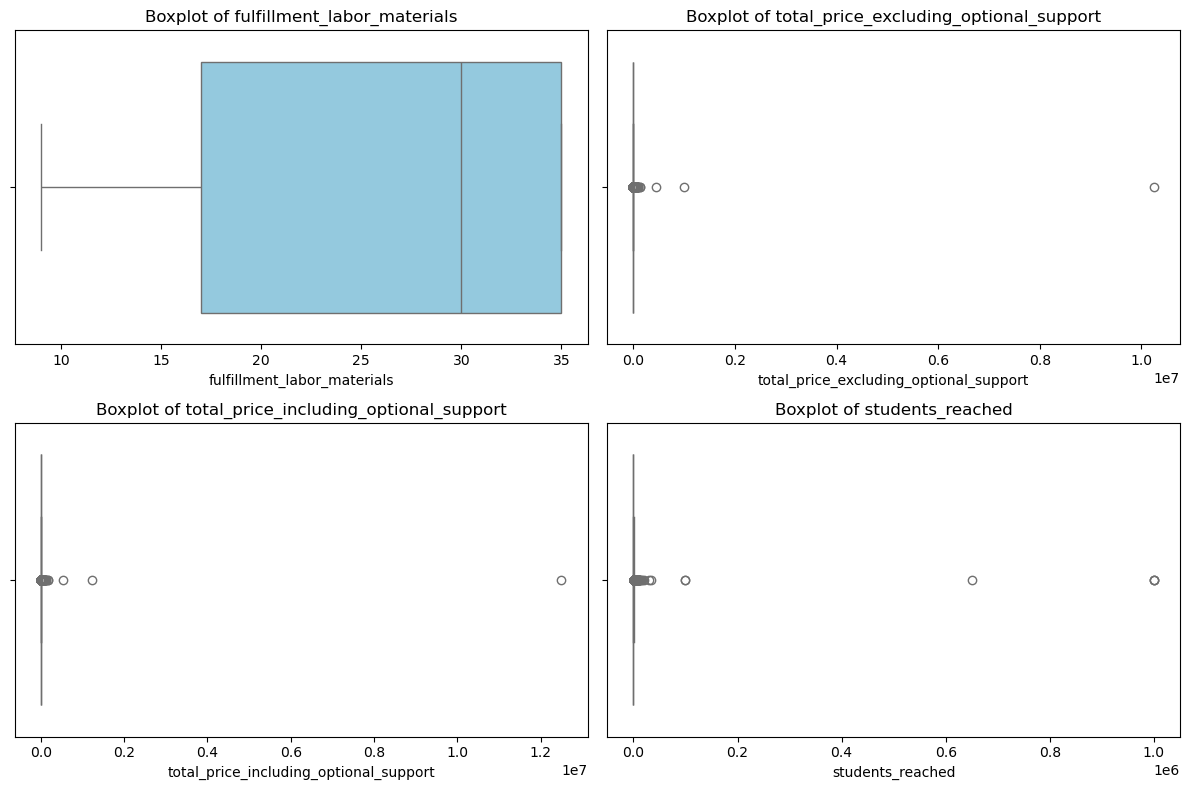

In [11]:

# numeric columns to plot to get an idea about outliers:
num_cols = [
    'fulfillment_labor_materials', 
    'total_price_excluding_optional_support', 
    'total_price_including_optional_support', 
    'students_reached'
]

# Set the size of the plots
plt.figure(figsize=(12, 8))

# Create boxplots for each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, iterate for each plot
    sns.boxplot(x=merged_df[col], color="skyblue", showfliers=True)  # showfliers to highlight outliers
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [12]:
print("Original shape:", merged_df.shape)

outlier_df = merged_df.copy()

# I first tried using IQR to remove outliers, but it was filtering out too many values that actually seemed reasonable,
# especially since things like cost and number of students can vary a lot between schools.
# So instead, I decided to just drop the negative values since costs and students can't be negative,
# and then I manually removed a few extremely large values that looked like data entry errors (like millions of dollars or students).

for col in ['fulfillment_labor_materials', 'total_price_excluding_optional_support', 
            'total_price_including_optional_support', 'students_reached']:
    outlier_df = outlier_df[outlier_df[col] >= 0]

# Define upper bounds based on manual inspection of boxplots
upper_bounds = {
    'total_price_excluding_optional_support': 5000,
    'total_price_including_optional_support': 6000,
    'students_reached': 1000
}

# Drop rows above these thresholds
for col, max_val in upper_bounds.items():
    outlier_df = outlier_df[outlier_df[col] <= max_val]

print(f"Shape after capping extreme outliers: {outlier_df.shape}")


Original shape: (619326, 24)
Shape after capping extreme outliers: (617010, 24)


In [13]:
# Apply preprocessing with specific columns

# Columns to encode
columns_to_encode = ['primary_focus_area', 'school_metro', 'grade_level',
        'poverty_level', 'resource_type', 'teacher_prefix', 'school_metro']

processed_df = preprocess_data(outlier_df, columns_to_encode)

# Display sample of processed data
print("\nSample of processed data (first 5 rows):")
display(processed_df.head())
    
# Show shape before and after
print(f"\nOriginal shape: {outlier_df.shape}")
print(f"Processed shape: {processed_df.shape}")

Starting preprocessing...
Encoded primary_focus_area into 6 dummy variables
Encoded school_metro into 2 dummy variables
Encoded grade_level into 3 dummy variables
Encoded poverty_level into 3 dummy variables
Encoded resource_type into 5 dummy variables
Encoded teacher_prefix into 4 dummy variables

Sample of processed data (first 5 rows):


,projectid,teacher_acctid,schoolid,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,resource_type_Other,resource_type_Supplies,resource_type_Technology,resource_type_Trips,resource_type_Visitors,teacher_prefix_Mr.,teacher_prefix_Mr. & Mrs.,teacher_prefix_Mrs.,teacher_prefix_Ms.,days_since_posted
0,62526d85d2a1818432d03d600969e99c,0,0,60103.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,4140
1,33d59ac771b80222ad63ef0f4ac47ade,1,1,83402.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,4140
2,1a3aaeffc56dd2a421e37d8298024c0a,2,2,3038.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,4140
3,33aa19ee4da4c5adf47d0dfb84fab5ef,3,3,23224.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4140
4,e31c0ea8b68f404699dfb0d39e9bc99b,4,4,60613.0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,4140



Original shape: (617010, 24)
Processed shape: (617010, 41)


In [14]:
print(processed_df.columns)

Index(['projectid', 'teacher_acctid', 'schoolid', 'school_zip',
       'school_charter', 'school_magnet', 'school_year_round', 'school_nlns',
       'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'eligible_double_your_impact_match', 'eligible_almost_home_match',
       'fully_funded', 'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_suburban',
       'school_metro_urban', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'poverty_level_highest poverty', 'poverty_level_low poverty',
       'poverty_level_moderate poverty', 'resource_type_Other',
       'resource

In [16]:
#dropping these after looking at correlation once
drop_these = [
    'projectid',
    'teacher_acctid',
    'schoolid', 
]

processed_df = processed_df.drop(columns=drop_these)


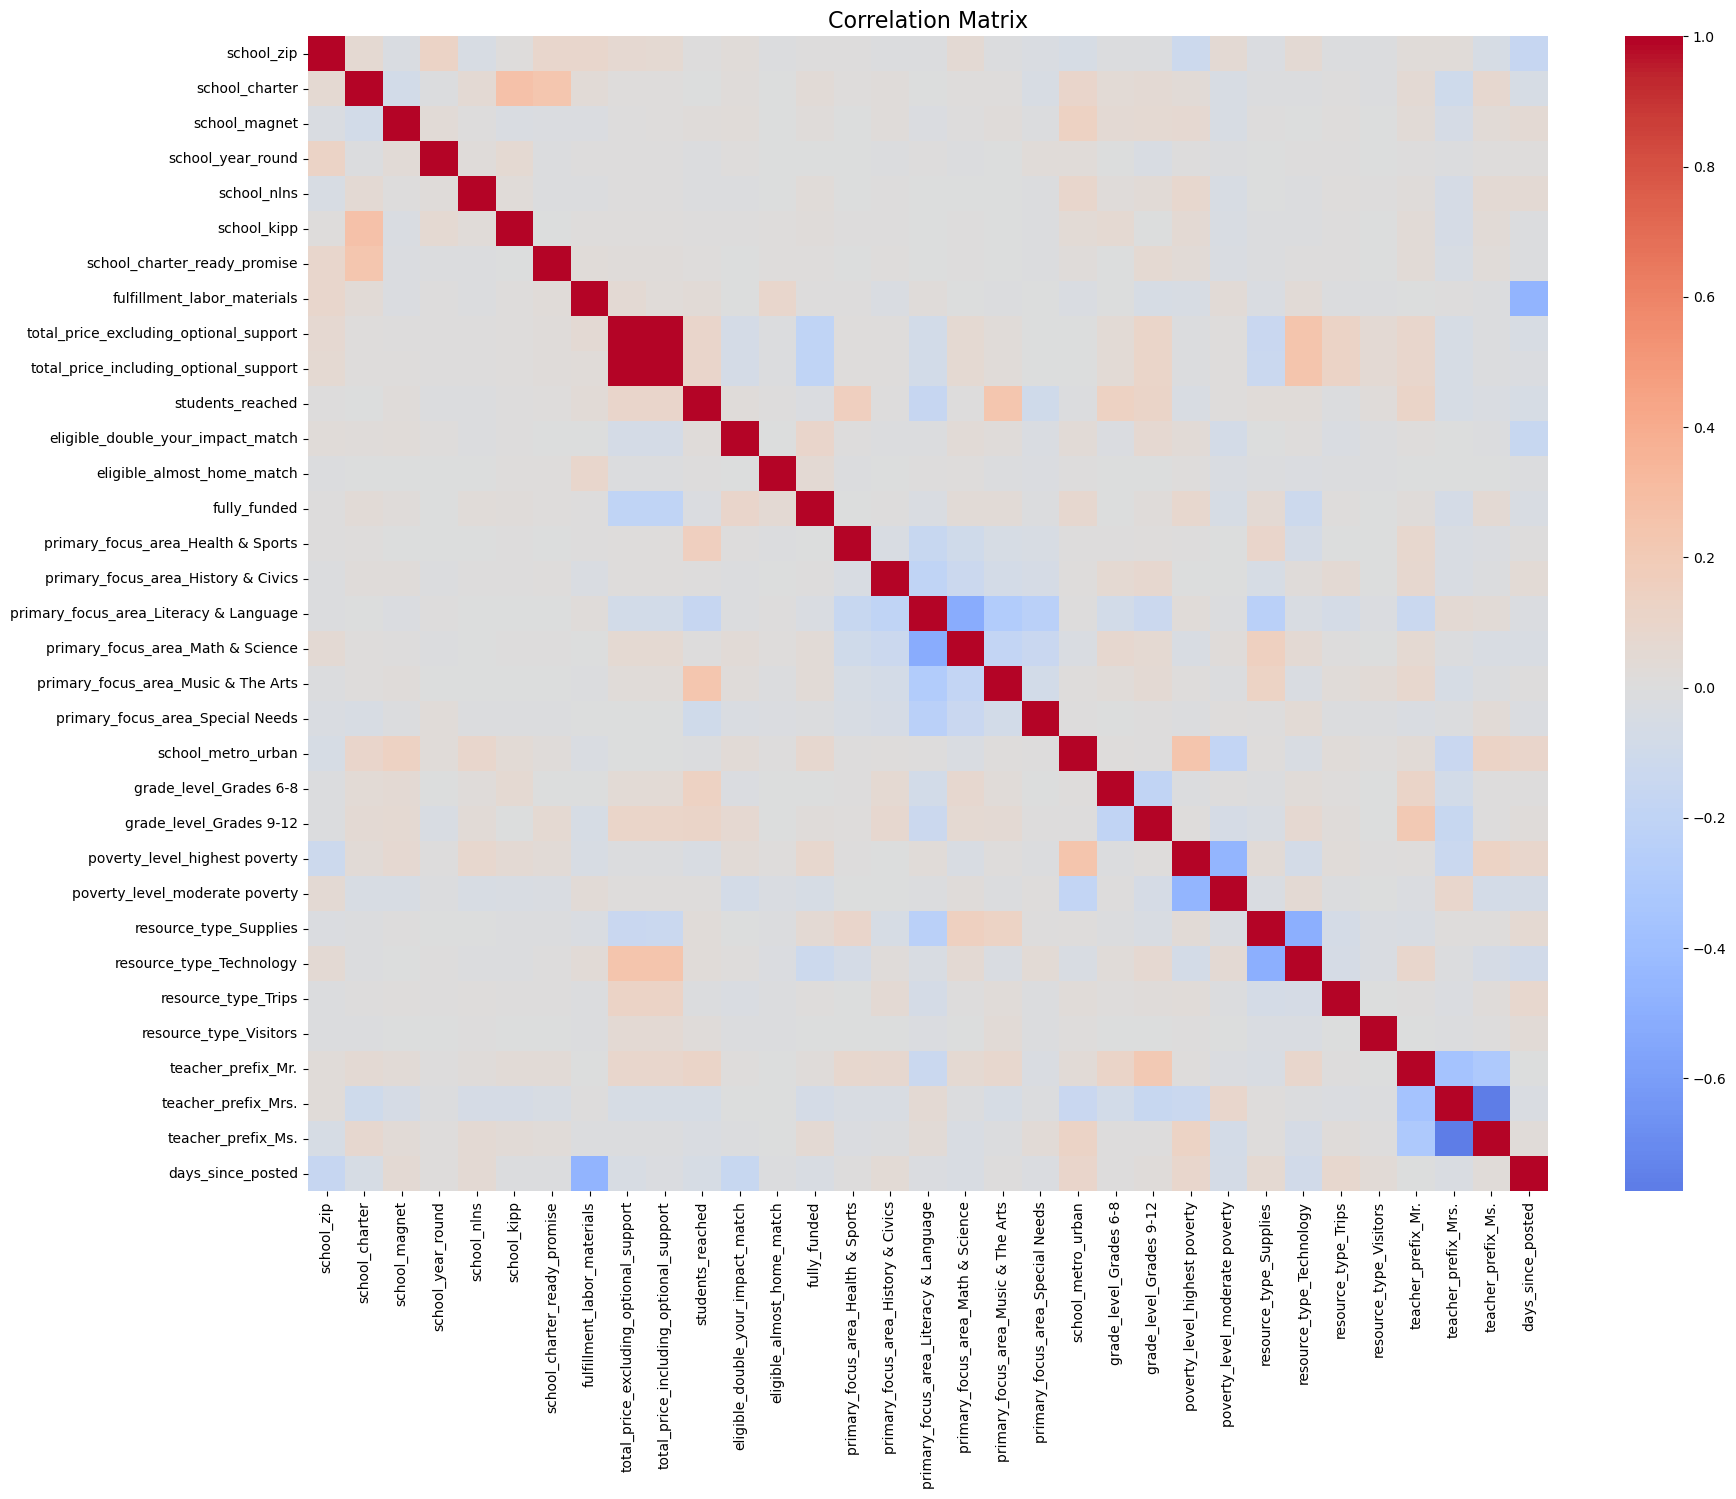

In [ ]:
#correlation matrix 
correlation_matrix = plot_correlation_matrix(processed_df)

In [17]:
processed_df = processed_df.drop(columns = ['total_price_excluding_optional_support'])
#negative correlation expected among the variables which were hot-encoded

### After Cleaning

In [18]:
print(processed_df.columns)

Index(['school_zip', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_including_optional_support',
       'students_reached', 'eligible_double_your_impact_match',
       'eligible_almost_home_match', 'fully_funded',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_suburban',
       'school_metro_urban', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'poverty_level_highest poverty', 'poverty_level_low poverty',
       'poverty_level_moderate poverty', 'resource_type_Other',
       'resource_type_Supplies', 'resource_type_Technology',
       'resource_type_Trips', 'resource_type_Vi

In [19]:
processed_df['fully_funded'].value_counts(normalize = True)

fully_funded
1    0.696289
0    0.303711
Name: proportion, dtype: float64

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score

X = processed_df.drop(['fully_funded'], axis=1)

X = X.select_dtypes(exclude=['object', 'bool'])
y = processed_df['fully_funded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=100000, test_size=0.2,
    random_state=42, stratify=y
    )


In [21]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate model
    print(f"Classification Report for {str(model).split('(')[0]} model:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
    
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"\nRecall: {recall}")
    print(f"Precision: {precision}")
    
    return model

In [22]:
# Train and evaluate different models
models = {
    #'Logistic Regression': LogisticRegression(max_iter=100000),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

for name, model in models.items():
    print(f"\n{name} Results:")
    train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

print(f"\nBefore SMOTE - Training examples: {len(X_train)}") #Ask where SMOTE has been applied
print(f"Class distribution: {np.bincount(y_train)}")


Naive Bayes Results:
Classification Report for GaussianNB model:
              precision    recall  f1-score   support

           0       0.49      0.11      0.18     37479
           1       0.71      0.95      0.81     85923

    accuracy                           0.69    123402
   macro avg       0.60      0.53      0.49    123402
weighted avg       0.64      0.69      0.62    123402


Confusion Matrix:
[[ 4054 33425]
 [ 4241 81682]]

ROC AUC Score: 0.6555185815469595

Recall: 0.9506418537527787
Precision: 0.7096180075929353

Gradient Boosting Results:
Classification Report for GradientBoostingClassifier model:
              precision    recall  f1-score   support

           0       0.66      0.25      0.36     37479
           1       0.74      0.95      0.83     85923

    accuracy                           0.73    123402
   macro avg       0.70      0.60      0.59    123402
weighted avg       0.72      0.73      0.69    123402


Confusion Matrix:
[[ 9186 28293]
 [ 4670 81253]]

##### Baseline Model (Logistic Regression) 
##### ROC: 67.9%, Precision: 71%

In [23]:
# baseline model:

X = processed_df.drop(columns=['fully_funded']) 
y = processed_df['fully_funded'] 

# Train/test split with handling imbalance dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# model with class weight 
baseline_model = LogisticRegression(max_iter=1000000, random_state=42)
baseline_model.fit(X_train, y_train)

#predict and evaluate
y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1]

#matrices:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba))

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
    
print(f"\nRecall: {recall}")
print(f"Precision: {precision}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[ 5211 32268]
 [ 3835 82088]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.14      0.22     37479
           1       0.72      0.96      0.82     85923

    accuracy                           0.71    123402
   macro avg       0.65      0.55      0.52    123402
weighted avg       0.67      0.71      0.64    123402


ROC AUC Score:
0.6808676692845785

Recall: 0.9553670146526542
Precision: 0.7178285354506978


##### Feature Selection using Feature Importance - Logistic Regression - Not helpful at all

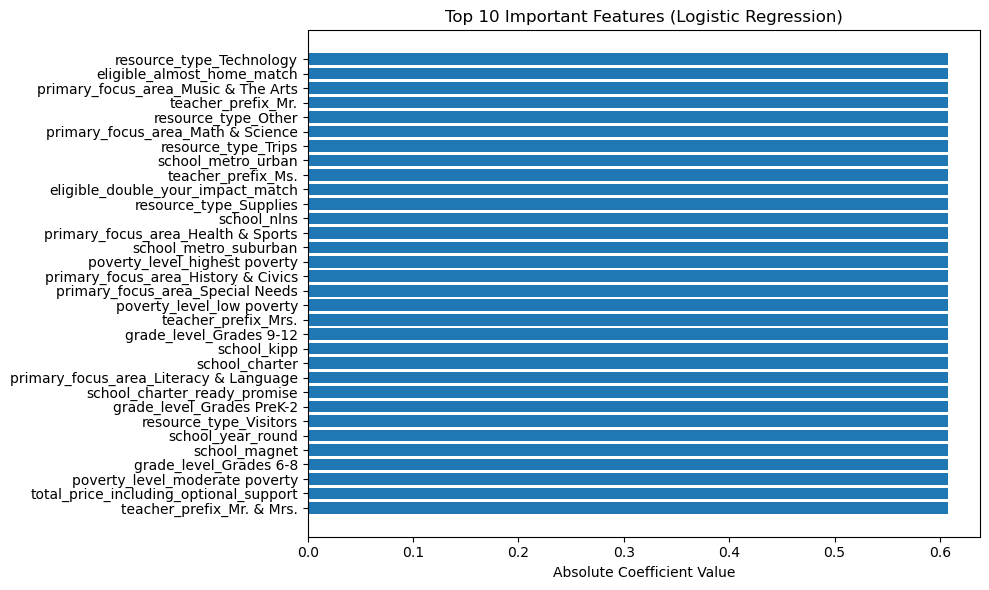

In [24]:
#feature selection

# Get feature names and coefficients
feature_names = X_train.columns
coefficients = baseline_model.coef_[0]

# Create DataFrame for importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)  #using coefficients to get the magnitude
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting top 10
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'].head(32)[::-1], importance_df['Importance'].head(1)[::-1])
plt.xlabel("Absolute Coefficient Value")
plt.title("Top 10 Important Features (Logistic Regression)")
plt.tight_layout()
plt.show()


In [25]:
top_features = importance_df['Feature'].head(10).tolist()

X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

top_feature_model = LogisticRegression(max_iter=1000000, random_state=42)
top_feature_model.fit(X_train_reduced, y_train)
y_pred_top_features  = top_feature_model.predict(X_test_reduced)
y_proba_top_features  = top_feature_model.predict_proba(X_test_reduced)[:, 1]

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_top_features ))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_top_features ))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba_top_features ))


Confusion Matrix:
[[ 1997 35482]
 [ 2126 83797]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.05      0.10     37479
           1       0.70      0.98      0.82     85923

    accuracy                           0.70    123402
   macro avg       0.59      0.51      0.46    123402
weighted avg       0.64      0.70      0.60    123402


ROC AUC Score:
0.6212072012424766


##### Feature Matrix - Logistic Regression 
##### ROC AUC Score: 68%, Precision: 79%

In [26]:
processed_df.columns

Index(['school_zip', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_including_optional_support',
       'students_reached', 'eligible_double_your_impact_match',
       'eligible_almost_home_match', 'fully_funded',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_suburban',
       'school_metro_urban', 'grade_level_Grades 6-8',
       'grade_level_Grades 9-12', 'grade_level_Grades PreK-2',
       'poverty_level_highest poverty', 'poverty_level_low poverty',
       'poverty_level_moderate poverty', 'resource_type_Other',
       'resource_type_Supplies', 'resource_type_Technology',
       'resource_type_Trips', 'resource_type_Vi

01 features: school_charter                           | ROC AUC: 0.5097 | Precision: 0.6956
02 features: school_magnet                            | ROC AUC: 0.5167 | Precision: 0.6956
03 features: school_year_round                        | ROC AUC: 0.5169 | Precision: 0.6956
04 features: school_nlns                              | ROC AUC: 0.5198 | Precision: 0.6956
05 features: school_kipp                              | ROC AUC: 0.5199 | Precision: 0.6956
06 features: school_charter_ready_promise             | ROC AUC: 0.5195 | Precision: 0.6956
07 features: fulfillment_labor_materials              | ROC AUC: 0.5255 | Precision: 0.6956
08 features: total_price_including_optional_support   | ROC AUC: 0.6593 | Precision: 0.7040
09 features: students_reached                         | ROC AUC: 0.6589 | Precision: 0.7039
10 features: eligible_double_your_impact_match        | ROC AUC: 0.6587 | Precision: 0.7044
11 features: eligible_almost_home_match               | ROC AUC: 0.6623 | Precis

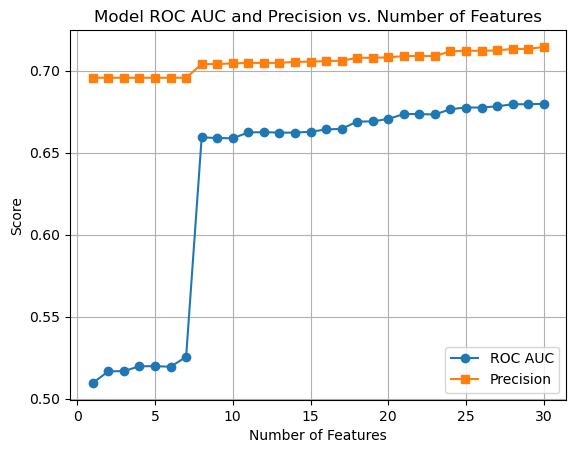

In [27]:
features = [
     'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise',
       'fulfillment_labor_materials', 'total_price_including_optional_support',
       'students_reached', 'eligible_double_your_impact_match',
       'eligible_almost_home_match',
       'primary_focus_area_Health & Sports',
       'primary_focus_area_History & Civics',
       'primary_focus_area_Literacy & Language',
       'primary_focus_area_Math & Science',
       'primary_focus_area_Music & The Arts',
       'primary_focus_area_Special Needs', 'school_metro_urban',
       'grade_level_Grades 6-8', 'grade_level_Grades 9-12',
       'poverty_level_highest poverty', 'poverty_level_moderate poverty',
       'resource_type_Supplies', 'resource_type_Technology',
       'resource_type_Trips', 'resource_type_Visitors', 'teacher_prefix_Mr.',
       'teacher_prefix_Mrs.', 'teacher_prefix_Ms.', 'days_since_posted']

roc_auc_scores = []
precision_scores = []

for i in range(1, len(features)+1):
    selected_features = features[:i]
    X = processed_df[selected_features]
    y = processed_df['fully_funded']  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=5000)  
    model.fit(X_train, y_train)

    #predictions
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)

    # hard predictions for precision
    y_pred = model.predict(X_test)
    prec = precision_score(y_test, y_pred)

    print(
        f"{i:02d} features: {selected_features[-1]:<40} | "
        f"ROC AUC: {auc_score:.4f} | Precision: {prec:.4f}"
    )

    roc_auc_scores.append((selected_features.copy(), auc_score))
    precision_scores.append((selected_features.copy(), prec))

# plot ROC AUC
auc_values = [a[1] for a in roc_auc_scores]
plt.plot(range(1, len(auc_values)+1), auc_values, marker='o', label="ROC AUC")

# Precision on same chart
prec_values = [p[1] for p in precision_scores]
plt.plot(range(1, len(prec_values)+1), prec_values, marker='s', label="Precision")

plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("Model ROC AUC and Precision vs. Number of Features")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
#first seven are not contributing at all, so going to ignore them 

start_index = 7  
features_to_use = features[start_index:]

X_selected_features = processed_df[features_to_use]
y_selected_features = processed_df['fully_funded']  

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected_features, y_selected_features, test_size=0.2, stratify=y, random_state=42)

# model with class weight 
selectedFeatures_model = LogisticRegression(max_iter=1000000, class_weight='balanced', random_state=42)
selectedFeatures_model.fit(X_train2, y_train2)

#predict and evaluate
y_pred2 = selectedFeatures_model.predict(X_test2)
y_proba2 = selectedFeatures_model.predict_proba(X_test2)[:, 1]

#matrices:
print("Confusion Matrix:")
print(confusion_matrix(y_test2, y_pred2))

print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

print("\nROC AUC Score:")
print(roc_auc_score(y_test2, y_proba2))


Confusion Matrix:
[[22402 15077]
 [28661 57262]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.60      0.51     37479
           1       0.79      0.67      0.72     85923

    accuracy                           0.65    123402
   macro avg       0.62      0.63      0.61    123402
weighted avg       0.68      0.65      0.66    123402


ROC AUC Score:
0.6808168267893727


In [30]:
recall = recall_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
    
print(f"\nRecall: {recall}")
print(f"Precision: {precision}")


Recall: 0.6664339001198748
Precision: 0.7915785399300516


##### Rest of the Models

In [31]:
start_index = 7  
features_to_use = features[start_index:]

X_selected_features = processed_df[features_to_use]
y_selected_features = processed_df['fully_funded']  

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected_features, y_selected_features, test_size=0.2, stratify=y, random_state=42)


def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate model
    print(f"Classification Report for {str(model).split('(')[0]} model:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
    
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"\nRecall: {recall}")
    print(f"Precision: {precision}")
    
    return model

# Train and evaluate different models
models = {
    #'Logistic Regression': LogisticRegression(max_iter=100000),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

for name, model in models.items():
    print(f"\n{name} Results:")
    train_and_evaluate_model(model, X_train2, X_test2, y_train2, y_test2)

print(f"Class distribution: {np.bincount(y_train)}")


Naive Bayes Results:
Classification Report for GaussianNB model:
              precision    recall  f1-score   support

           0       0.45      0.35      0.39     37479
           1       0.74      0.81      0.78     85923

    accuracy                           0.67    123402
   macro avg       0.60      0.58      0.58    123402
weighted avg       0.65      0.67      0.66    123402


Confusion Matrix:
[[13046 24433]
 [15943 69980]]

ROC AUC Score: 0.6367330940090911

Recall: 0.8144501472248409
Precision: 0.7412114857064176

Gradient Boosting Results:
Classification Report for GradientBoostingClassifier model:
              precision    recall  f1-score   support

           0       0.64      0.22      0.32     37479
           1       0.73      0.95      0.83     85923

    accuracy                           0.72    123402
   macro avg       0.69      0.58      0.58    123402
weighted avg       0.71      0.72      0.67    123402


Confusion Matrix:
[[ 8142 29337]
 [ 4604 81319]]

## Cross Validation and Grid Search Setup

In [60]:
RANDOM_STATE = 42
N_SPLITS_CV = 5 
N_SPLITS_GS = 3 
SCORING_METRIC_CV = 'roc_auc' 
SCORING_METRIC_GS = 'roc_auc' 


print(f"\nX_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test Data Shape: X_test={X_test.shape}, y_test={y_test.shape}")



X_train=(431907, 30), y_train=(431907,)
Test Data Shape: X_test=(185103, 30), y_test=(185103,)


## Cross Validation

In [61]:
pipelines_cv = {}


log_reg_cv = LogisticRegression(
    max_iter=10000, 
    random_state=RANDOM_STATE,
    solver='liblinear', 
    class_weight='balanced' 
)
pipelines_cv['Logistic Regression'] = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', log_reg_cv)
])

pipelines_cv['Naive Bayes'] = Pipeline([
    ('classifier', GaussianNB())
])

pipelines_cv['Gradient Boosting'] = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=RANDOM_STATE)) 
])

pipelines_cv['XGBoost'] = Pipeline([
    ('classifier', xgb.XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')) 
    ])

cv_strategy = StratifiedKFold(n_splits=N_SPLITS_CV, shuffle=True, random_state=RANDOM_STATE)

cv_scores = {}

for name, pipeline in pipelines_cv.items():
    scores = cross_val_score(
        pipeline,
        X_train, 
        y_train,
        cv=cv_strategy,
        scoring=SCORING_METRIC_CV,
        n_jobs=-1 
        )
    cv_scores[name] = scores


mean_cv_scores = {name: np.mean(scores) for name, scores in cv_scores.items()}
best_model_name_from_cv = max(mean_cv_scores, key=mean_cv_scores.get)
print(f"\nBest model type based on {N_SPLITS_CV}-Fold CV ({SCORING_METRIC_CV}): {best_model_name_from_cv} (Score: {mean_cv_scores[best_model_name_from_cv]:.4f})")
cv_results_df = pd.DataFrame(cv_scores).agg(['mean', 'std']).T
print("\nCross-Validation Summary:")
print(cv_results_df)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa


Best model type based on 5-Fold CV (roc_auc): XGBoost (Score: 0.7663)

Cross-Validation Summary:
                         mean       std
Logistic Regression  0.681646  0.001955
Naive Bayes          0.631327  0.001647
Gradient Boosting    0.736231  0.001344
XGBoost              0.766337  0.001580


## Grid Search

In [62]:
cv_strategy_grid = StratifiedKFold(n_splits=N_SPLITS_GS, shuffle=True, random_state=RANDOM_STATE)

grid_search = GridSearchCV(
    estimator=pipeline_to_tune,
    param_grid=param_grid_to_use,
    scoring=SCORING_METRIC_GS,
    cv=cv_strategy_grid,
    n_jobs=-1,       
    verbose=2        
)
grid_search.fit(X_train, y_train) 
best_cv_score_gs = grid_search.best_score_
best_params = grid_search.best_params_
best_tuned_pipeline = grid_search.best_estimator_ 

print(f"\nBest {SCORING_METRIC_GS} score from Grid Search: {best_cv_score_gs:.4f}")
print(f"Best Hyperparameters found:")
for param, value in best_params.items():
     print(f"  {param}: {value}")

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.6s
[CV] END classifier_

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.4s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.4s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.9; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.2s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.3s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.3s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.4s
[CV] END classifier

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.2s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.8s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.8s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.8s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.8s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.4s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.5s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.5s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.5s
[CV] END classi

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.5s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.3s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.3s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.4s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.3s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.9; total time=   2.8s
[CV] END classifier__col

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.3s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.9s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.9s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.8s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.4s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.5s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.0s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.1s
[CV] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.9; total time=   2.3s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.2s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.9; total time=   2.4s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.8s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.5s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.9s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.6s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.2s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.3s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.3s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.4s
[CV] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.5s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.4s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.5s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.6s
[CV] END class

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.8s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.8s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.5s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   2.9s
[CV] END c

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.8s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.8s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.9s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.3s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.3s
[CV] END classifie

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.4s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.5s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.0s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.5s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.2s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.5s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.1s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.2s
[CV] END classifier

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.0s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.1s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.1s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.1s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.5s
[CV] END classifier__col

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.9s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.5s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.5s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   2.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.3s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.4s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.3s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.1s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.3s
[CV] END classifier_

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.3s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.9s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.9; total time=   2.2s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.9; total time=   2.2s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.3s
[CV] E

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.5s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.6s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.9s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   3.1s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.2s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.5s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   3.1s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.5s
[CV] END 

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:12:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.8s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.8s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   2.0s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.2s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.7; total time=   1.9s
[CV] END class

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:13:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:13:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:13:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:13:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.6s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=50, classifier__subsample=0.9; total time=   1.6s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.4s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   2.2s
[CV] END classifier__colsample_bytree=0.9, classifier__gamma=0.1, classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.7; total time=   2.4s
[CV] END cla


Final Test Set ROC AUC Score: 0.7572

Final Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40     56340
           1       0.75      0.94      0.83    128763

    accuracy                           0.74    185103
   macro avg       0.71      0.61      0.62    185103
weighted avg       0.73      0.74      0.70    185103


Final Test Set Confusion Matrix:
[[ 16280  40060]
 [  7880 120883]]


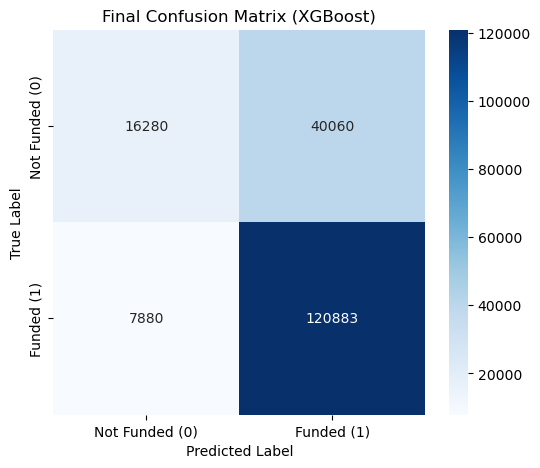

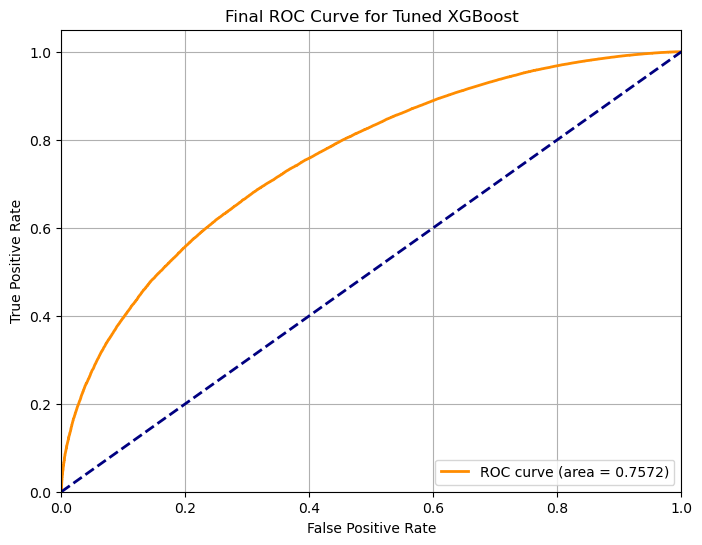


Summary
Mean CV Score (roc_auc) for XGBoost: 0.7663
Best Grid Search Score (roc_auc) for XGBoost: 0.7559
Final Test Set ROC AUC for XGBoost: 0.7572


In [63]:
y_pred_final = best_tuned_pipeline.predict(X_test)

y_proba_final = best_tuned_pipeline.predict_proba(X_test)[:, 1]
roc_auc_final = roc_auc_score(y_test, y_proba_final)
print(f"\nFinal Test Set ROC AUC Score: {roc_auc_final:.4f}")


print("\nFinal Test Set Classification Report:")
print(classification_report(y_test, y_pred_final, zero_division=0))

print("\nFinal Test Set Confusion Matrix:")
cm_final = confusion_matrix(y_test, y_pred_final)
print(cm_final)


class_names = ['Not Funded (0)', 'Funded (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Final Confusion Matrix ({best_model_name_from_cv})')
plt.show()

if y_proba_final is not None and roc_auc_final is not None:
    fpr, tpr, _ = roc_curve(y_test, y_proba_final)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_final:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Final ROC Curve for Tuned {best_model_name_from_cv}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


print("\nSummary")
if best_model_name_from_cv in cv_scores:
     print(f"Mean CV Score ({SCORING_METRIC_CV}) for {best_model_name_from_cv}: {np.mean(cv_scores[best_model_name_from_cv]):.4f}")
if best_cv_score_gs > -1:
     print(f"Best Grid Search Score ({SCORING_METRIC_GS}) for {best_model_name_from_cv}: {best_cv_score_gs:.4f}")
if best_tuned_pipeline and roc_auc_final is not None:
     print(f"Final Test Set ROC AUC for {best_model_name_from_cv}: {roc_auc_final:.4f}")
elif best_tuned_pipeline:
     print(f"Final Test Set Accuracy for {best_model_name_from_cv}: {accuracy_score(y_test, y_pred_final):.4f}")

## Probability Threshold Tuning (using Test Set probabilities)


--- Probability Thresholds for XGBoost on Test Set (Optimizing F1-Score) ---

Optimal Threshold based on F1-Score: 0.47
Metrics at Optimal Threshold (F1-Score):
  F1-Score:             0.8357
  Precision:            0.7426
  Recall (Sensitivity): 0.9556
  Specificity (TNR):    0.2428


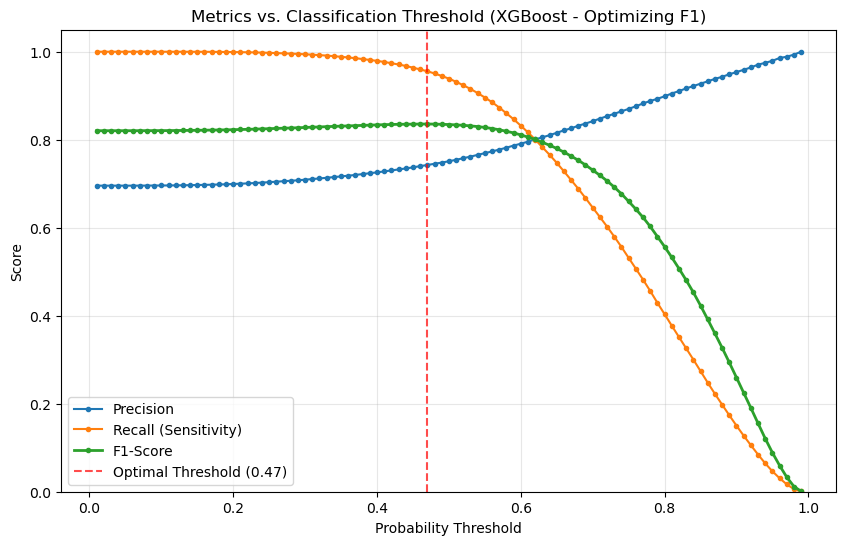


--- Evaluating with Optimal Threshold for F1 (0.47) ---

Classification Report (Optimal Threshold for F1):
              precision    recall  f1-score   support

           0       0.71      0.24      0.36     56340
           1       0.74      0.96      0.84    128763

    accuracy                           0.74    185103
   macro avg       0.72      0.60      0.60    185103
weighted avg       0.73      0.74      0.69    185103


Confusion Matrix (Optimal Threshold for F1):
[[ 13680  42660]
 [  5717 123046]]


In [66]:
print(f"\n--- Probability Thresholds for {best_model_name_from_cv} on Test Set (Optimizing F1-Score) ---")

thresholds = np.arange(0.01, 1.0, 0.01) # Evaluate from 0.01 to 0.99

threshold_metrics = []
for thresh in thresholds:
    y_pred_thresh = (y_proba_final >= thresh).astype(int)

    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh, labels=[0, 1]).ravel()

    # Calculate metrics, handling potential division by zero
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0 # Sensitivity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0 # TNR
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    threshold_metrics.append({
        'Threshold': thresh,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity (TNR)': specificity,
        'F1': f1,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn
    })

threshold_df = pd.DataFrame(threshold_metrics)

# Find optimal threshold based on F1-score
optimal_idx_f1 = threshold_df['F1'].idxmax()
optimal_threshold_f1 = threshold_df.loc[optimal_idx_f1, 'Threshold']
optimal_metrics_f1 = threshold_df.loc[optimal_idx_f1]

print(f"\nOptimal Threshold based on F1-Score: {optimal_threshold_f1:.2f}")
print("Metrics at Optimal Threshold (F1-Score):")
print(f"  F1-Score:             {optimal_metrics_f1['F1']:.4f}")
print(f"  Precision:            {optimal_metrics_f1['Precision']:.4f}")
print(f"  Recall (Sensitivity): {optimal_metrics_f1['Recall (Sensitivity)']:.4f}")
print(f"  Specificity (TNR):    {optimal_metrics_f1['Specificity (TNR)']:.4f}")


# Plot Precision, Recall, F1 vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], label='Precision', marker='.')
plt.plot(threshold_df['Threshold'], threshold_df['Recall (Sensitivity)'], label='Recall (Sensitivity)', marker='.')
plt.plot(threshold_df['Threshold'], threshold_df['F1'], label='F1-Score', marker='.', lw=2)
# plt.plot(threshold_df['Threshold'], threshold_df['Specificity (TNR)'], label='Specificity (TNR)', marker='.') # Optional

plt.axvline(x=optimal_threshold_f1, color='r', linestyle='--', alpha=0.7, label=f'Optimal Threshold ({optimal_threshold_f1:.2f})')

plt.title(f'Metrics vs. Classification Threshold ({best_model_name_from_cv} - Optimizing F1)')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([0.0, 1.05])
plt.show()

# Evaluate with the optimal threshold for F1-Score
print(f"\n--- Evaluating with Optimal Threshold for F1 ({optimal_threshold_f1:.2f}) ---")
y_pred_optimal_final_f1 = (y_proba_final >= optimal_threshold_f1).astype(int)
print("\nClassification Report (Optimal Threshold for F1):")
print(classification_report(y_test, y_pred_optimal_final_f1, zero_division=0))
print("\nConfusion Matrix (Optimal Threshold for F1):")
cm_optimal_f1 = confusion_matrix(y_test, y_pred_optimal_final_f1)
print(cm_optimal_f1)
# Optional: Plot optimal confusion matrix
# plot_confusion_matrix(cm_optimal_f1) # Assumes plot_confusion_matrix function exists


--- Probability Thresholds for XGBoost on Test Set (Optimizing Youden's J) ---

Optimal Threshold based on Youden's J: 0.68
Metrics at Optimal Threshold (Youden's J):
  Youden's J:           0.3703
  Specificity (TNR):    0.6818
  Recall (Sensitivity): 0.6885
  Precision:            0.8318
  F1-Score:             0.7534


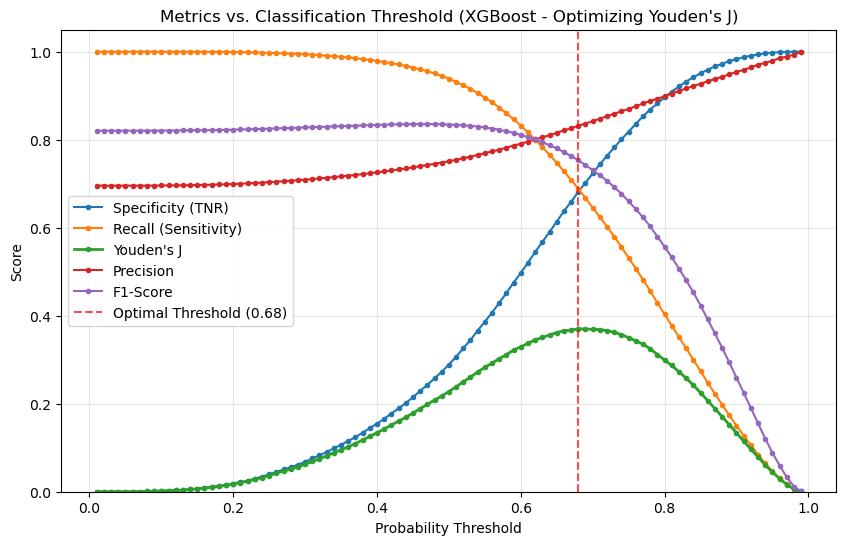


--- Evaluating with Optimal Threshold for Youden's J (0.68) ---

Classification Report (Optimal Threshold for Youden's J):
              precision    recall  f1-score   support

           0       0.49      0.68      0.57     56340
           1       0.83      0.69      0.75    128763

    accuracy                           0.69    185103
   macro avg       0.66      0.69      0.66    185103
weighted avg       0.73      0.69      0.70    185103


Confusion Matrix (Optimal Threshold for Youden's J):
[[38411 17929]
 [40112 88651]]


In [ ]:
print(f"\n--- Probability Thresholds for {best_model_name_from_cv} on Test Set (Optimizing Youden's J) ---")

# Define thresholds to evaluate
thresholds = np.arange(0.01, 1.0, 0.01) 

# Calculate metrics for each threshold
threshold_metrics = []
for thresh in thresholds:
    y_pred_thresh = (y_proba_final >= thresh).astype(int)

    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh, labels=[0, 1]).ravel()

    # Calculate metrics, handling potential division by zero
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0 # Sensitivity (TPR)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0 # TNR
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    youdens_j = recall + specificity - 1 # Youden's J statistic

    threshold_metrics.append({
        'Threshold': thresh,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity (TNR)': specificity,
        'F1': f1,
        'Youdens_J': youdens_j,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn
    })

threshold_df = pd.DataFrame(threshold_metrics)

# Find optimal threshold based on Youden's J
optimal_idx_j = threshold_df['Youdens_J'].idxmax()
optimal_threshold_j = threshold_df.loc[optimal_idx_j, 'Threshold']
optimal_metrics_j = threshold_df.loc[optimal_idx_j]

print(f"\nOptimal Threshold based on Youden's J: {optimal_threshold_j:.2f}")
print("Metrics at Optimal Threshold (Youden's J):")
print(f"  Youden's J:           {optimal_metrics_j['Youdens_J']:.4f}")
print(f"  Specificity (TNR):    {optimal_metrics_j['Specificity (TNR)']:.4f}")
print(f"  Recall (Sensitivity): {optimal_metrics_j['Recall (Sensitivity)']:.4f}")
print(f"  Precision:            {optimal_metrics_j['Precision']:.4f}")
print(f"  F1-Score:             {optimal_metrics_j['F1']:.4f}")


# Plot Specificity, Recall (Sensitivity), Youden's J vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(threshold_df['Threshold'], threshold_df['Specificity (TNR)'], label='Specificity (TNR)', marker='.')
plt.plot(threshold_df['Threshold'], threshold_df['Recall (Sensitivity)'], label='Recall (Sensitivity)', marker='.')
plt.plot(threshold_df['Threshold'], threshold_df['Youdens_J'], label="Youden's J", marker='.', lw=2)
plt.plot(threshold_df['Threshold'], threshold_df['Precision'], label='Precision', marker='.') 
plt.plot(threshold_df['Threshold'], threshold_df['F1'], label='F1-Score', marker='.') 

plt.axvline(x=optimal_threshold_j, color='r', linestyle='--', alpha=0.7, label=f'Optimal Threshold ({optimal_threshold_j:.2f})')

plt.title(f'Metrics vs. Classification Threshold ({best_model_name_from_cv} - Optimizing Youden\'s J)')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim([0.0, 1.05])
plt.show()

# Evaluate with the optimal threshold for Youden's J 
print(f"\n--- Evaluating with Optimal Threshold for Youden's J ({optimal_threshold_j:.2f}) ---")
y_pred_optimal_final_j = (y_proba_final >= optimal_threshold_j).astype(int)
print("\nClassification Report (Optimal Threshold for Youden's J):")
print(classification_report(y_test, y_pred_optimal_final_j, zero_division=0))
print("\nConfusion Matrix (Optimal Threshold for Youden's J):")
cm_optimal_j = confusion_matrix(y_test, y_pred_optimal_final_j)
print(cm_optimal_j)